# Assignment 2

### Github Link:

### 1. Visualize brain tumor images that demonstrate when images have tumors and when they do not have tumors.

In [2]:
import sys
import time
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications  import VGG19, ResNet50, InceptionV3

import warnings
warnings.filterwarnings('ignore')

In [14]:
!unzip brain_tumor_dataset.zip 

Archive:  brain_tumor_dataset.zip
replace brain_tumor_dataset/no/30 no.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
# Extracting all filenames iteratively from brain_tumor_dataset folder
base_path = 'brain_tumor_dataset'
categories = ['yes', 'no']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:4]) #examples of file names

number of images for each category: [155, 98]
[['brain_tumor_dataset/yes/Y157.JPG', 'brain_tumor_dataset/yes/Y6.jpg', 'brain_tumor_dataset/yes/Y194.jpg', 'brain_tumor_dataset/yes/Y180.jpg', 'brain_tumor_dataset/yes/Y90.jpg', 'brain_tumor_dataset/yes/Y47.JPG', 'brain_tumor_dataset/yes/Y53.jpg', 'brain_tumor_dataset/yes/Y52.jpg', 'brain_tumor_dataset/yes/Y46.jpg', 'brain_tumor_dataset/yes/Y91.jpg', 'brain_tumor_dataset/yes/Y85.JPG', 'brain_tumor_dataset/yes/Y181.jpg', 'brain_tumor_dataset/yes/Y195.JPG', 'brain_tumor_dataset/yes/Y7.jpg', 'brain_tumor_dataset/yes/Y156.JPG', 'brain_tumor_dataset/yes/Y168.jpg', 'brain_tumor_dataset/yes/Y154.jpg', 'brain_tumor_dataset/yes/Y183.jpg', 'brain_tumor_dataset/yes/Y78.jpg', 'brain_tumor_dataset/yes/Y50.JPG', 'brain_tumor_dataset/yes/Y44.JPG', 'brain_tumor_dataset/yes/Y45.JPG', 'brain_tumor_dataset/yes/Y51.jpg', 'brain_tumor_dataset/yes/Y79.jpg', 'brain_tumor_dataset/yes/Y86.JPG', 'brain_tumor_dataset/yes/Y92.jpg', 'brain_tumor_dataset/yes/Y92.png', 

In [6]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img
import numpy as np
from PIL import Image

img = load_img('brain_tumor_dataset/yes/Y26.jpg')
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(628, 630)


In [7]:
from keras.preprocessing import image
import numpy as np
from PIL import Image

def load_image(img_path):
        img = Image.open(img_path).convert("RGB").resize((224,224)) 
        img = (np.float32(img)-np.float32(img).min())/(np.float32(img).max()-np.float32(img).min()) 
        img=img.reshape((224,224,3))
        return img

preprocessed_image_data=list(map(load_image, fnames[0]+fnames[1])) 

X= np.array(preprocessed_image_data) 


In [8]:
from itertools import repeat

yes=list(repeat("yes", 155))
no=list(repeat("no", 98))

y_labels = yes+no

print(len(y_labels) )

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

253


,no,yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
248,1,0
249,1,0
250,1,0
251,1,0


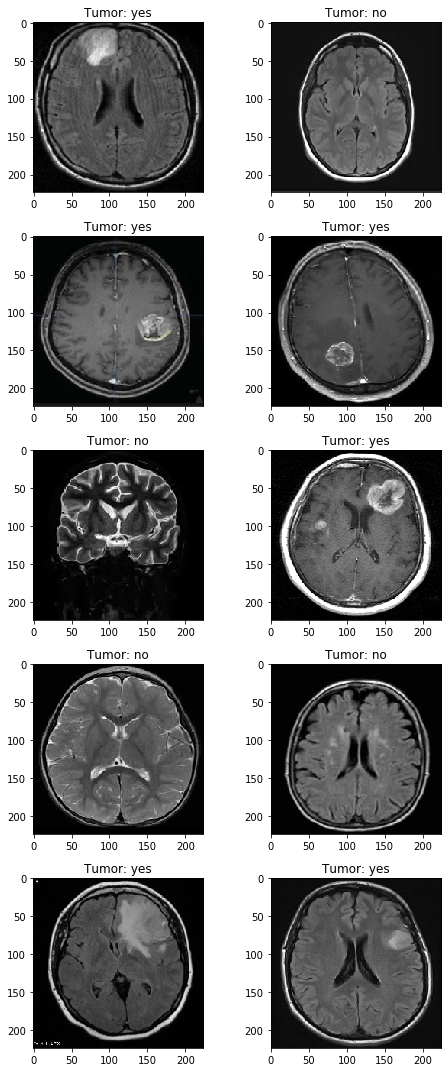

In [9]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(7,15)
for i in range(5):
    for j in range (2):
        l= np.random.randint(0,len(y_labels))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Tumor: '+y_labels[l])
        
plt.tight_layout()

The above figures randomly visualize ten brain tumor images and demonstrate whether they have tumors or not.

### 2. Discuss why building a predictive model using this data might be practically useful.  Who could benefit from a model like this? Explain.

Because the predictive model could help us decide whether a brain is likely to have tumor or not. Both doctors and patients could benefit from this model, as doctors could use this model result as a reference to their diagnosis and patients could receive more accurate treatment. 

### 3. Run at least three prediction models to try to predict brain tumor MRI images well.
#### Use transfer learning for at least one of these models
#### Discuss which models performed better and point out relevant hyper-parameter values for successful models.

### Model 1

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [65]:
model1 = tf.keras.Sequential([   
      tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=[224, 224, 3]),
      tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=2),
      tf.keras.layers.Conv2D(kernel_size=3, filters=16, padding='same', activation='relu'),
      tf.keras.layers.Conv2D(kernel_size=1, filters=8, padding='same', activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation='softmax')
    ])
    
model1.compile(
      optimizer="adam", 
      loss= 'categorical_crossentropy',
      metrics=['accuracy'])
    
model1.fit(X_train, y_train, 
                      epochs = 5, verbose=1,validation_data=(X_test,y_test)) 

Train on 202 samples, validate on 51 samples
Epoch 1/5
202/202 [==============================] - 13s 64ms/sample - loss: 0.6532 - accuracy: 0.6139 - val_loss: 0.7288 - val_accuracy: 0.5294
Epoch 2/5
202/202 [==============================] - 11s 54ms/sample - loss: 0.6364 - accuracy: 0.6337 - val_loss: 0.6348 - val_accuracy: 0.5294
Epoch 3/5
202/202 [==============================] - 11s 56ms/sample - loss: 0.6329 - accuracy: 0.6485 - val_loss: 0.5885 - val_accuracy: 0.6078
Epoch 4/5
202/202 [==============================] - 12s 59ms/sample - loss: 0.5863 - accuracy: 0.6535 - val_loss: 0.4884 - val_accuracy: 0.8235
Epoch 5/5
202/202 [==============================] - 11s 55ms/sample - loss: 0.5867 - accuracy: 0.6881 - val_loss: 0.4843 - val_accuracy: 0.7843


In [136]:
import os
os.environ['TF_KERAS'] = '1' # Add this environmental variable whenever you use tensorflow's tf.keras to build your keras model
import onnx

import keras2onnx

from keras2onnx import convert_keras
onx = convert_keras(model, 'my_model.onnx')
with open("my_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [137]:
def predict_classes(x): 
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

raw_predictions=model1.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

labels=['no','yes']

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1
 1 1 1 0 0 0 0 1 1 1 1 0 0 0]
['no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'no']


In [138]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
from math import sqrt

def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro")
        precision_eval = precision_score(y_true, y_pred,average="macro")
        recall_eval = recall_score(y_true, y_pred,average="macro")
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

In [139]:
y_test_labels=pd.DataFrame(y_test,columns=['no','yes']).idxmax(axis=1) #extract labels from one hot encoded y_test object

modelevalobject=model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.784314,0.781287,0.788095,0.780093,0,0,0,0


In [140]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 224, 224, 32)      1056      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 112, 112, 32)      9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 112, 112, 32)      1056      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 56, 56, 32)      

### Model 2

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization,Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.python.keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.callbacks import ModelCheckpoint

opt=SGD(lr=.001)

model2 = Sequential()
model2.add(Dense(64,  input_shape=(224, 224, 3), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Flatten())
model2.add(Dense(2, activation='softmax'))

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True) 
red_lr= ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor=0.5, min_lr=0.001)                                              

model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model2.fit(X_train, y_train, 
            epochs = 5, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/5
192/202 [===========================>..] - ETA: 0s - loss: 0.6492 - accuracy: 0.6510
Epoch 00001: val_accuracy improved from -inf to 0.52941, saving model to best_model.h5
202/202 [==============================] - 21s 102ms/sample - loss: 0.6507 - accuracy: 0.6436 - val_loss: 0.6434 - val_accuracy: 0.5294
Epoch 2/5
192/202 [===========================>..] - ETA: 0s - loss: 0.6126 - accuracy: 0.6510
Epoch 00002: val_accuracy improved from 0.52941 to 0.54902, saving model to best_model.h5
202/202 [==============================] - 21s 105ms/sample - loss: 0.6247 - accuracy: 0.6337 - val_loss: 0.6325 - val_accuracy: 0.5490
Epoch 3/5
192/202 [===========================>..] - ETA: 0s - loss: 0.6202 - accuracy: 0.6510
Epoch 00003: val_accuracy did not improve from 0.54902
202/202 [==============================] - 21s 103ms/sample - loss: 0.6137 - accuracy: 0.6584 - val_loss: 0.6288 - val_accuracy: 0.5294
Epoch 4/5
192/202 [===========

In [70]:
raw_predictions=model2.predict(X_test)
print(predict_classes(raw_predictions))

prediction_index=predict_classes(raw_predictions)

labels=['no','yes']

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1 0]
['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']


In [71]:
y_test_labels=pd.DataFrame(y_test,columns=['no','yes']).idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.607843,0.507722,0.787234,0.583333,0,0,0,0


### Model 3 (Transfer Learning)

In [97]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(224, 224, 3),include_top=False, weights='imagenet') 
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [98]:
base_model.trainable = False

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [112]:
model3 = Sequential([
  base_model,
   GlobalAveragePooling2D(),
   Dense(2, activation='softmax')
])

model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 512)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 1026      
Total params: 14,715,714
Trainable params: 1,026
Non-trainable params: 14,714,688
_________________________________________________________________


In [113]:
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model3.fit(X_train, y_train, 
            epochs = 5, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

Train on 202 samples, validate on 51 samples
Epoch 1/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6962 - accuracy: 0.6302 
Epoch 00001: val_accuracy did not improve from 0.60784
202/202 [==============================] - 69s 343ms/sample - loss: 0.6923 - accuracy: 0.6337 - val_loss: 0.7804 - val_accuracy: 0.5294
Epoch 2/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6719 - accuracy: 0.6458 
Epoch 00002: val_accuracy did not improve from 0.60784
202/202 [==============================] - 62s 309ms/sample - loss: 0.6833 - accuracy: 0.6337 - val_loss: 0.7575 - val_accuracy: 0.5294
Epoch 3/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6725 - accuracy: 0.6406 
Epoch 00003: val_accuracy did not improve from 0.60784

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.001.
202/202 [==============================] - 62s 307ms/sample - loss: 0.6777 - accuracy: 0.6337 - val_loss: 0.7475 - val_accuracy: 0.5294
Epoch 4/5
192/202 [==========

In [161]:
raw_predictions=model3.predict(X_test)

prediction_index=predict_classes(raw_predictions)

labels=['no','yes']

predicted_labels=list(map(lambda x: labels[x], prediction_index))

In [117]:
y_test_labels=pd.DataFrame(y_test,columns=['no','yes']).idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.529412,0.346154,0.264706,0.5,0,0,0,0


All in all, model 1 performs best with total params of 81,524 (Trainable params: 40,762 and Non-trainable params: 40,762). 

### 4. Submit your best model to the leader board for the Brain Tumor Diagnostic AI Model Share competition.

In [132]:
#install aimodelshare library (version 0.0.3 last updated 3/6/2020)
! pip3 install https://github.com/mikedparrott/aimodelshare/blob/master/aimodelshare-0.0.5.tar.gz?raw=true

  Created wheel for aimodelshare: filename=aimodelshare-0.0.5-py3-none-any.whl size=5303 sha256=e423c2e8d5a98b41d77626763d2b7ab3dbb8ff69a89fe87f560001c93c75977a
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/92/f8/26/59ad201dd65e4eeb596cfde28eb7d9340396f3687f129ecac0
Successfully built aimodelshare
  Attempting uninstall: aimodelshare
    Found existing installation: aimodelshare 0.0.2
    Uninstalling aimodelshare-0.0.2:
      Successfully uninstalled aimodelshare-0.0.2


In [143]:
import pickle

apiurl="https://a53yv0xqce.execute-api.us-east-1.amazonaws.com/prod/m"
username = "zl2842"
password = "19linziren19"

model_filepath="my_model.onnx"   

model=model1

aws_key_password_region = pickle.load( open( "/Users/apple/Downloads/Week 7 Tabular Mini-hackathon/braintumor_modelsubmission_keys.pkl", "rb" ) ) 

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [142]:
import aimodelshare as ai

ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,
                apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

Please review model details and then resubmit to update this model.


### 5. Import the best model from the leader board (whatever the best model is after your final submission)
#### Note: Import the model's config and it's optimization config.
#### Visualize the model's structure using tf.kera's model.summary() 
#### Explain how the model's structure is different from your best model.
#### Explain how the model's optimization approach is different from your best model

In [146]:
import aimodelshare as ai

leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,mae,model_config,model_epochs,model_optim_config,model_version,mse,precision,r2,recall,rmse,username,avg_ranking_classification,avg_ranking_regression
17,0.941176,0.940812,0,backend: tensorflow\nclass_name: Sequential\nc...,5.0,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",17,0,0.942547,0,0.939815,0,Taketo,0.469907,1.0
16,0.901961,0.901354,0,backend: tensorflow\nclass_name: Sequential\nc...,10.0,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",16,0,0.902950,0,0.900463,0,Taketo,0.450231,2.0
18,0.875000,0.868718,0,backend: tensorflow\nclass_name: Sequential\nc...,25.0,"{'name': 'Adam', 'learning_rate': 0.01, 'decay...",18,0,0.868718,0,0.868718,0,3scman,0.434359,3.5
23,0.862745,0.862745,0,backend: tensorflow\nclass_name: Sequential\nc...,25.0,"{'name': 'Adam', 'learning_rate': 1.5625e-05, ...",24,0,0.865741,0,0.865741,0,dhoward97,0.432870,4.5
40,0.862745,0.862745,0,NaN,NaN,NaN,48,0,0.865741,0,0.865741,0,jaeham,0.432870,4.5
46,0.862745,0.862745,0,NaN,NaN,NaN,49,0,0.865741,0,0.865741,0,jaeham,0.432870,4.5
1,0.862745,0.862745,0,NaN,NaN,NaN,47,0,0.865741,0,0.865741,0,jaeham,0.432870,4.5
25,0.862745,0.862534,0,backend: tensorflow\nclass_name: Sequential\nc...,50.0,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",26,0,0.862308,0,0.863426,0,seanmcalevey,0.431713,5.5
19,0.823529,0.813187,0,backend: tensorflow\nclass_name: Sequential\nc...,25.0,"{'name': 'Adam', 'learning_rate': 0.001, 'deca...",19,0,0.875000,0,0.812500,0,AlisaAi,0.406250,5.0
22,0.843137,0.841615,0,backend: tensorflow\nclass_name: Sequential\nc...,25.0,"{'name': 'SGD', 'learning_rate': 0.001, 'decay...",23,0,0.845611,0,0.840278,0,seanmcalevey,0.420139,6.5


In [159]:
model_config= leaderboard.iloc[0]['model_config'] # model details best model (i.e.-row #1)
model_optim_config= leaderboard.iloc[0]['model_optim_config'] # model details best model (i.e.-row #1)

print(model_config)
print(model_optim_config)

backend: tensorflow
class_name: Sequential
config:
  build_input_shape: !!python/object/apply:tensorflow.python.framework.tensor_shape.TensorShape
  - - !!python/object/apply:tensorflow.python.framework.tensor_shape.Dimension [null]
    - !!python/object/apply:tensorflow.python.framework.tensor_shape.Dimension [224]
    - !!python/object/apply:tensorflow.python.framework.tensor_shape.Dimension [224]
    - !!python/object/apply:tensorflow.python.framework.tensor_shape.Dimension [3]
  layers:
  - class_name: Model
    config:
      batch_input_shape: !!python/tuple [null, 224, 224, 3]
      input_layers:
      - [input_17, 0, 0]
      layers:
      - class_name: InputLayer
        config:
          batch_input_shape: !!python/tuple [null, 224, 224, 3]
          dtype: float32
          name: input_17
          ragged: false
          sparse: false
        inbound_nodes: []
        name: input_17
      - class_name: Conv2D
        config:
          activation: linear
          activity_re

In [166]:
# Import model config to use to fit same architecture to new data
from tensorflow.keras.models import model_from_yaml
model = model_from_yaml(model_config)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 4098      
Total params: 21,806,882
Trainable params: 32,738
Non-trainable params: 21,774,144
_________________________________________________________________


The best model applies transfer learning which starts with pre-established weights and retrains model final output layer to fit new output layer parameters. It adds new GAP layer and outputs layer to frozen layers of original model with adjusted input.

### 6. Fit the best model from the leader board to training data and evaluate it on test data to complete your report.

In [172]:
model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model3.fit(X_train, y_train, 
            epochs = 5, verbose=1,validation_data=(X_test,y_test),callbacks=[mc,red_lr])

raw_predictions=model.predict(X_test)

prediction_index=predict_classes(raw_predictions)

labels=['no','yes']

predicted_labels=list(map(lambda x: labels[x], prediction_index))

Train on 202 samples, validate on 51 samples
Epoch 1/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6697 - accuracy: 0.6302 
Epoch 00001: val_accuracy did not improve from 0.60784
202/202 [==============================] - 62s 309ms/sample - loss: 0.6728 - accuracy: 0.6238 - val_loss: 0.7325 - val_accuracy: 0.5098
Epoch 2/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6735 - accuracy: 0.6250 
Epoch 00002: val_accuracy did not improve from 0.60784
202/202 [==============================] - 61s 304ms/sample - loss: 0.6715 - accuracy: 0.6238 - val_loss: 0.7326 - val_accuracy: 0.5098
Epoch 3/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6807 - accuracy: 0.6146 
Epoch 00003: val_accuracy did not improve from 0.60784
202/202 [==============================] - 61s 301ms/sample - loss: 0.6734 - accuracy: 0.6287 - val_loss: 0.7382 - val_accuracy: 0.5294
Epoch 4/5
192/202 [===========================>..] - ETA: 2s - loss: 0.6701 - accuracy: 0.6302

In [174]:
y_test_labels=pd.DataFrame(y_test,columns=['no','yes']).idxmax(axis=1) #extract labels from one hot encoded y_test object

model_eval_metrics=model_eval_metrics(y_test_labels,predicted_labels,classification="TRUE")